# 임포트 및 데이터 불러오기

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib import cm
import os as os
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
!pip install lightgbm
import lightgbm as lgb
import scipy as sp
from scipy.special import boxcox1p
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
from scipy.stats import uniform
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings(action='ignore')

In [5]:
# 기본 설정 읽기
import matplotlib.pyplot as plt

# size, family
print('# 설정되어있는 폰트 사이즈')
print (plt.rcParams['font.size'] ) 
print('# 설정되어있는 폰트 글꼴')
print (plt.rcParams['font.family'] )

# 설정되어있는 폰트 사이즈
10.0
# 설정되어있는 폰트 글꼴
['sans-serif']


In [14]:
import platform
platform.system()

# 운영체제별 한글 폰트 설정
if platform.system() == 'Darwin': # Mac 환경 폰트 설정
    plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows': # Windows 환경 폰트 설정
    plt.rc('font', family='Malgun Gothic')

plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정

In [16]:
import os
#os.chdir('C:/Users/postgres/Desktop/심리 성향 예측/open data') #desktop
os.chdir('C:/Users/user/Desktop/심리 성향 예측/open data') #notebook

In [17]:
train=pd.read_csv('train.csv', index_col=0)
test=pd.read_csv('test_x.csv', index_col=0)

# 문항 번호 수정 및 마키아벨리니즘 테스트 스코어 입력

In [18]:
flipping_columns = ["QeA", "QfA", "QkA", "QqA", "QrA","QaA", "QdA", "QgA", "QiA", "QnA"]
for flip in flipping_columns: # flip: 그림 좌우 및 상하 반전시키기
    train[flip] = 6 - train[flip]
    test[flip] = 6 - test[flip]

In [19]:
Answers = ['QaA', 'QbA', 'QcA', 'QdA', 'QeA',
             'QfA', 'QgA', 'QhA', 'QiA', 'QjA', 
             'QkA', 'QlA', 'QmA', 'QnA', 'QoA', 
             'QpA', 'QqA', 'QrA', 'QsA', 'QtA']

In [20]:
train['Mach_score'] = train[Answers].mean(axis = 1)
test['Mach_score'] = test[Answers].mean(axis = 1)

In [21]:
print(train.shape)
print(test.shape)

(45532, 78)
(11383, 77)


# 변수리스트 생성

In [25]:
Que = ['QaA', 'QaE', 'QbA', 'QbE', 'QcA', 'QcE', 'QdA', 'QdE', 'QeA', 'QeE',
       'QfA', 'QfE', 'QgA', 'QgE', 'QhA', 'QhE', 'QiA', 'QiE', 'QjA', 'QjE',
       'QkA', 'QkE', 'QlA', 'QlE', 'QmA', 'QmE', 'QnA', 'QnE', 'QoA', 'QoE',
       'QpA', 'QpE', 'QqA', 'QqE', 'QrA', 'QrE', 'QsA', 'QsE', 'QtA', 'QtE']

col_int = []
for col in train[Que]:
    if train[col].dtype == 'int64':
        col_int.append(col)
    else:
        continue

In [28]:
col_object = []
col_float = []
for col in Que:
    if train[col].dtype == 'object':
        col_object.append(col)
    elif train[col].dtype == 'float64':
        col_float.append(col)
    else:
        continue

In [31]:
col_object

[]

In [32]:
col_object = col_object + ['education', 'engnat', 'hand','married','religion','urban']

In [33]:
col_object

['education', 'engnat', 'hand', 'married', 'religion', 'urban']

# Preprocessing(결측치 처리)

In [19]:
print(train['familysize'].value_counts())
print(test['familysize'].value_counts())

2             17918
3             11256
1              6535
4              4907
5              1962
0              1217
6               838
7               387
8               221
9               126
10               59
11               39
12               21
13               11
14                9
15                8
44                3
17                3
21                2
16                2
20                2
999               1
100               1
34                1
18                1
2147483647        1
30                1
Name: familysize, dtype: int64
2     4454
3     2836
1     1679
4     1237
5      495
0      287
6      185
7       97
8       51
9       28
10      18
12       6
11       6
20       1
15       1
14       1
23       1
Name: familysize, dtype: int64


In [20]:
train_drop_familysize = train[train['familysize'] >= 10].index
test_drop_familysize = test[test['familysize'] >= 10].index
train.drop(index = train_drop_familysize,inplace = True)
test.drop(index = test_drop_familysize,inplace = True)

In [21]:
le = LabelEncoder()
train['voted'] = le.fit_transform(train['voted'])

# Preprocessing(무응답 처리)

In [22]:
no_ans = ['education','engnat','hand','urban']

In [23]:
train_no_ans = train[no_ans]
no_ans_idx1 = train_no_ans[(train_no_ans['education'] ==0) | (train_no_ans['engnat'] ==0) | (train_no_ans['hand'] ==0) | (train_no_ans['urban'] ==0)].index

test_no_ans = test[no_ans]
no_ans_idx2 = test_no_ans[(test_no_ans['education'] ==0) | (test_no_ans['engnat'] ==0) | (test_no_ans['hand'] ==0) | (test_no_ans['urban'] ==0)].index

In [24]:
train_1 = train.drop(index = no_ans_idx1)
train_2 = train.loc[no_ans_idx1]

test_1 = test.drop(index = no_ans_idx2)
test_2 = test.loc[no_ans_idx2]

# tp 처리

In [25]:
tp = ['tp01', 'tp02', 'tp03', 'tp04', 'tp05',
       'tp06', 'tp07', 'tp08', 'tp09', 'tp10']

In [26]:
train['01-06'] = train['tp01'] - train['tp06']
train['02-07'] = train['tp01'] - train['tp07']
train['03-08'] = train['tp01'] - train['tp08']
train['04-09'] = train['tp04'] - train['tp09']
train['05-10'] = train['tp05'] - train['tp10']

test['01-06'] = test['tp01'] - test['tp06']
test['02-07'] = test['tp01'] - test['tp07']
test['03-08'] = test['tp01'] - test['tp08']
test['04-09'] = test['tp04'] - test['tp09']
test['05-10'] = test['tp05'] - test['tp10']

In [27]:
print(train.shape)
print(test.shape)

(45367, 83)
(11349, 82)


# AGE

In [28]:
print('train_age_group_ratio')
print(train['age_group'].value_counts(1))

print('test_age_group_ratio')
print(test['age_group'].value_counts(1))

train_age_group_ratio
10s     0.312650
20s     0.310710
30s     0.172174
40s     0.110763
50s     0.062975
60s     0.025702
+70s    0.005026
Name: age_group, dtype: float64
test_age_group_ratio
10s     0.317032
20s     0.311834
30s     0.169178
40s     0.110230
50s     0.060710
60s     0.024672
+70s    0.006344
Name: age_group, dtype: float64


In [29]:
train_age_ratio = pd.DataFrame(train['age_group'].value_counts(1))
test_age_ratio = pd.DataFrame(test['age_group'].value_counts(1))

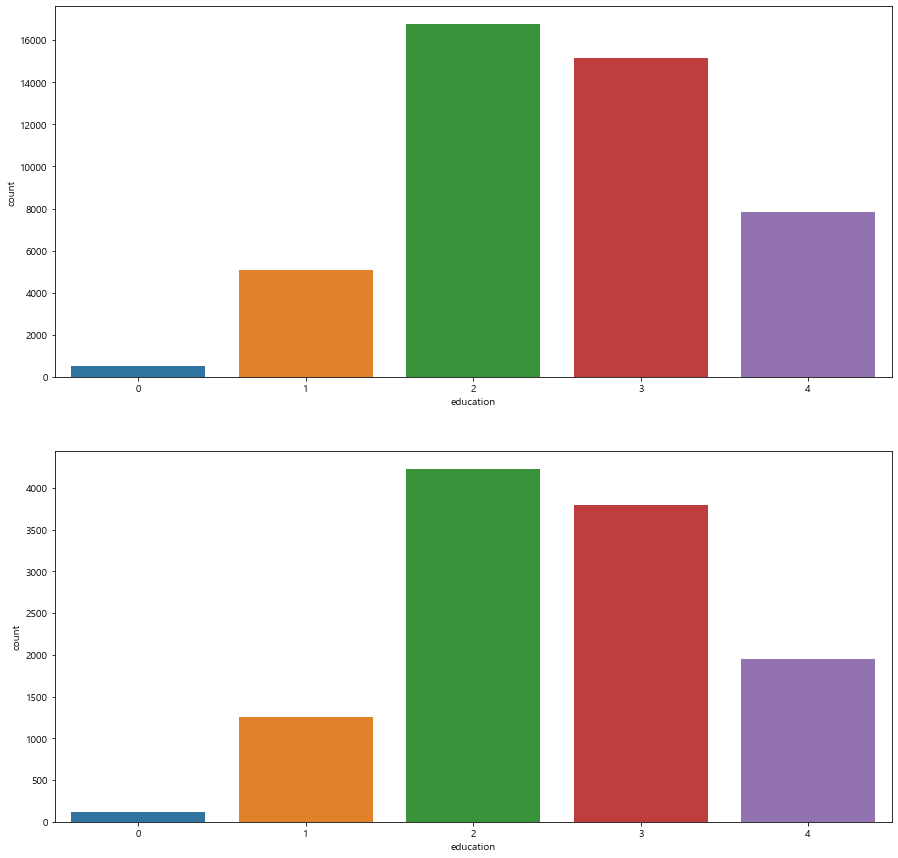

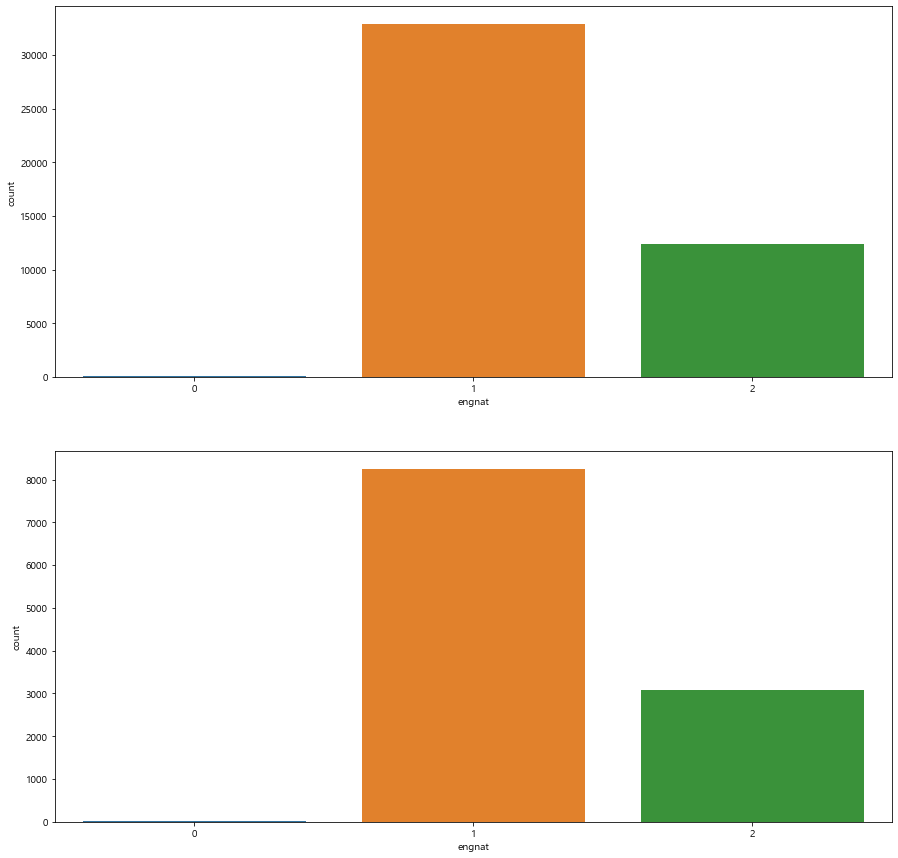

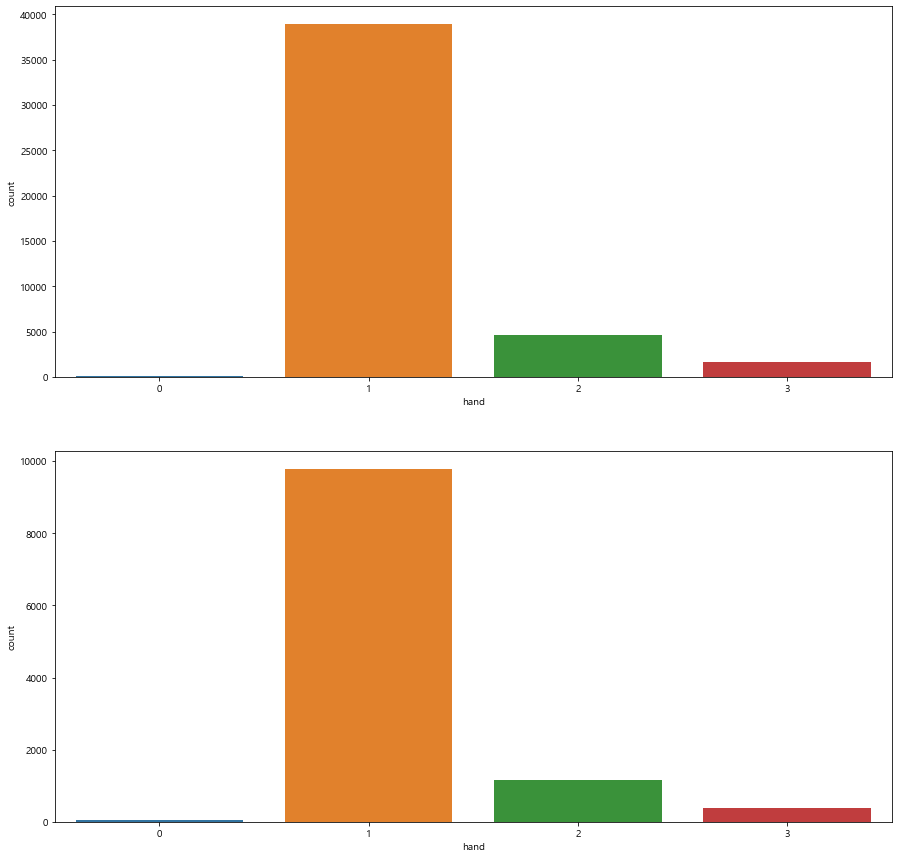

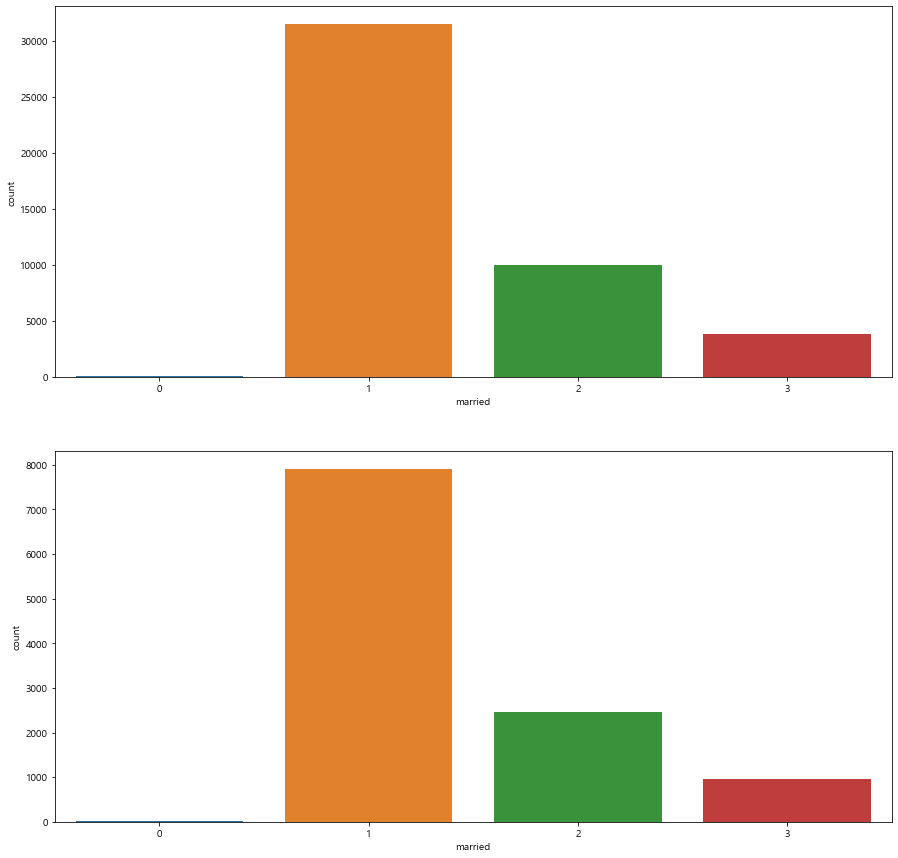

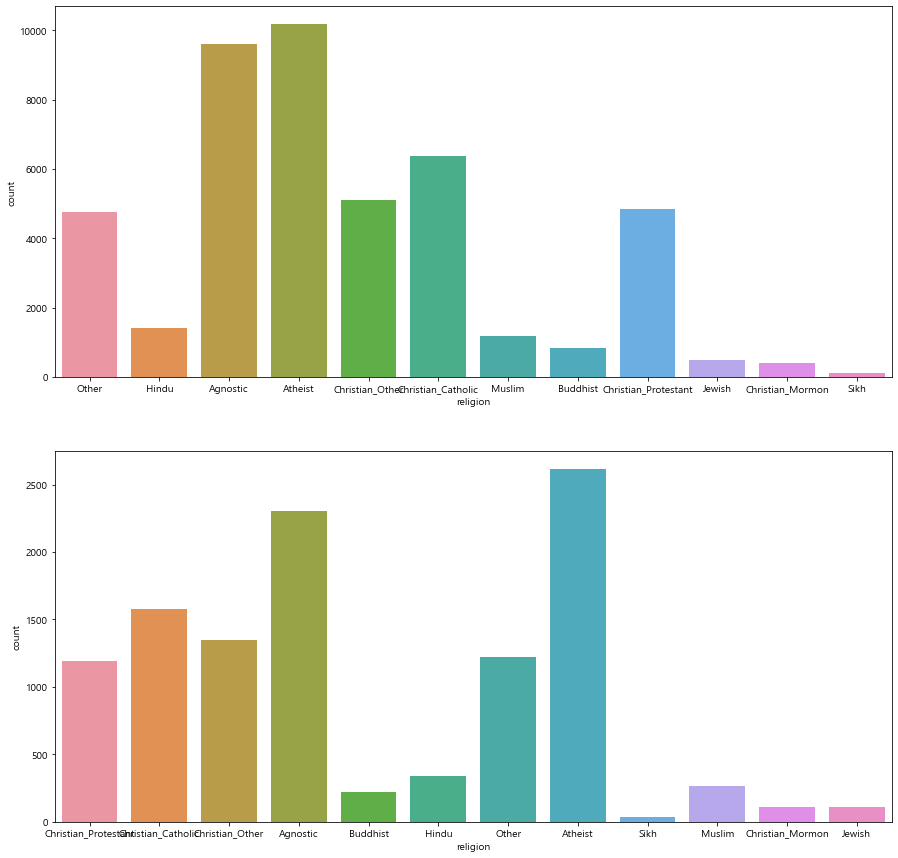

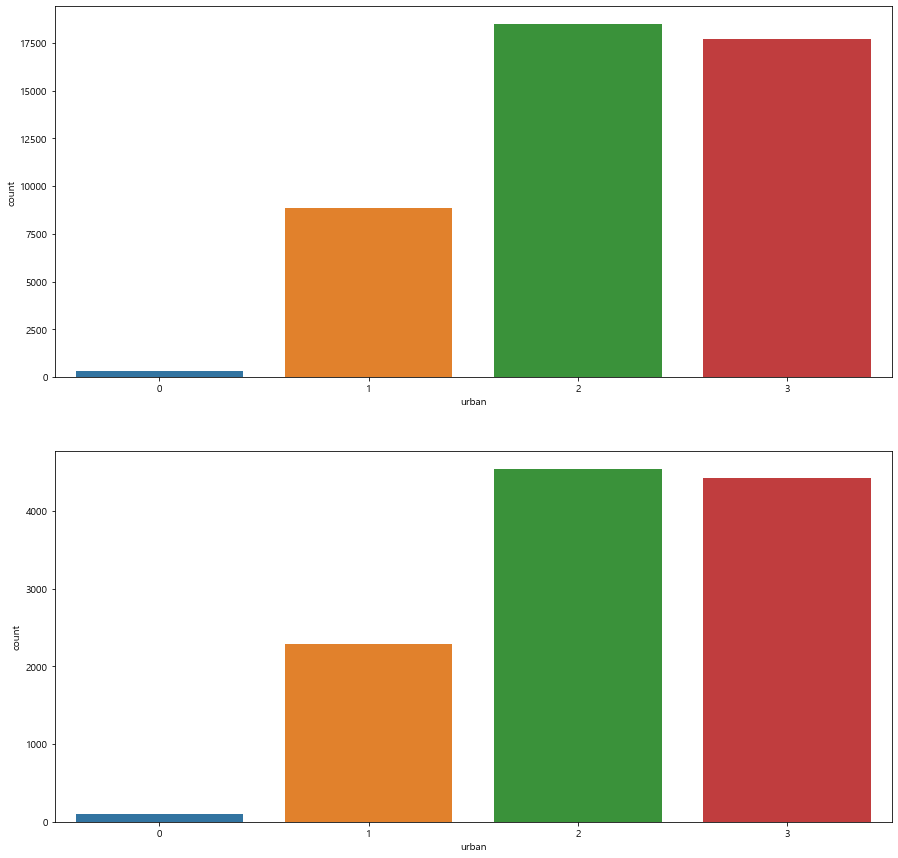

In [30]:
for col in train[col_object]:
    plt.figure(figsize = (15,15))
    plt.subplot(2,1,1)
    sns.countplot(train[col])
    plt.subplot(2,1,2)
    sns.countplot(test[col])

# WR Score

In [31]:
wr_col=[]
for i in range(1,14):
    if len(str(i))!=2:
        i = '0'+str(i)
    wr_col.append('wr_'+str(i))
wr_col

['wr_01',
 'wr_02',
 'wr_03',
 'wr_04',
 'wr_05',
 'wr_06',
 'wr_07',
 'wr_08',
 'wr_09',
 'wr_10',
 'wr_11',
 'wr_12',
 'wr_13']

In [32]:
train['wr_score'] = np.sum(train[wr_col],axis=1)
test['wr_score'] = np.sum(test[wr_col],axis=1)

In [33]:
# train
conditionlist = [
    (train['wr_score'] <= 8) ,
    (train['wr_score'] > 8) & (train['wr_score'] <=9),
    (train['wr_score'] > 9) & (train['wr_score'] <=11),
    (train['wr_score'] > 11)]
choicelist = ['1','2','3','4']
train['wr_score_range'] = np.select(conditionlist, choicelist, default='Not Specified')

In [34]:
# test
conditionlist = [
    (test['wr_score'] <= 8) ,
    (test['wr_score'] > 8) & (test['wr_score'] <=9),
    (test['wr_score'] > 9) & (test['wr_score'] <=11),
    (test['wr_score'] > 11)]
choicelist = ['1','2','3','4']
test['wr_score_range'] = np.select(conditionlist, choicelist, default='Not Specified')

# WF Score

In [35]:
train['wf_score'] = train['wf_01'] + train['wf_02'] + train['wf_03']
test['wf_score'] = test['wf_01'] + test['wf_02'] + test['wf_03']

print(train['wf_score'].value_counts(1))
print(test['wf_score'].value_counts(1))

0    0.738621
1    0.184451
2    0.054004
3    0.022924
Name: wf_score, dtype: float64
0    0.734514
1    0.188210
2    0.054807
3    0.022469
Name: wf_score, dtype: float64


In [36]:
# train
condition = [(train['wf_score']==0), (train['wf_score']!=0)]
choice = ['0','1']
train['wf'] = np.select(condition, choice, default='Not Specified')

In [37]:
# test
condition = [(test['wf_score']==0), (test['wf_score']!=0)]
choice = ['0','1']
test['wf'] = np.select(condition, choice, default='Not Specified')

# Time

In [38]:
train['Ave_time'] = round(np.sum(train[col_int],axis = 1) / 20)
test['Ave_time'] = round(np.sum(test[col_int],axis = 1) / 20)

In [39]:
train = train.astype({'Ave_time': 'float64'})
test = test.astype({'Ave_time': 'float64'})

In [40]:
# train
conditionlist = [
    (train['Ave_time'] <= 9.200000e+02) ,
    (train['Ave_time'] > 9.200000e+02) & (train['Ave_time'] <=1.189000e+03),
    (train['Ave_time'] > 1.189000e+03) & (train['Ave_time'] <=1.614000e+03),
    (train['Ave_time'] > 1.614000e+03)]
choicelist = ['1','2','3','4']
train['Ave_time_range'] = np.select(conditionlist, choicelist, default='Not Specified')

In [41]:
# test
conditionlist = [
    (test['Ave_time'] <= 9.200000e+02) ,
    (test['Ave_time'] > 9.200000e+02) & (test['Ave_time'] <=1.189000e+03),
    (test['Ave_time'] > 1.189000e+03) & (test['Ave_time'] <=1.614000e+03),
    (test['Ave_time'] > 1.614000e+03)]
choicelist = ['1','2','3','4']
test['Ave_time_range'] = np.select(conditionlist, choicelist, default='Not Specified')

In [42]:
print(train.shape)
print(test.shape)

(45367, 89)
(11349, 88)


# 극단적 표현

In [43]:
range(train.shape[0])

range(0, 45367)

In [44]:
train[col_float].head()

,QaA,QbA,QcA,QdA,QeA,QfA,QgA,QhA,QiA,QjA,QkA,QlA,QmA,QnA,QoA,QpA,QqA,QrA,QsA,QtA
index,,,,,,,,,,,,,,,,,,,,
0,3.0,4.0,5.0,5.0,4.0,1.0,4.0,4.0,1.0,4.0,2.0,4.0,2.0,1.0,2.0,2.0,4.0,4.0,2.0,1.0
1,1.0,5.0,3.0,1.0,5.0,3.0,5.0,1.0,1.0,3.0,1.0,4.0,1.0,1.0,1.0,5.0,1.0,5.0,4.0,1.0
2,2.0,1.0,1.0,2.0,1.0,5.0,2.0,1.0,3.0,2.0,1.0,5.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,1.0
3,3.0,3.0,4.0,3.0,5.0,4.0,2.0,3.0,1.0,4.0,3.0,4.0,4.0,2.0,4.0,4.0,3.0,2.0,4.0,5.0
4,5.0,1.0,5.0,4.0,5.0,4.0,5.0,1.0,1.0,5.0,1.0,5.0,4.0,4.0,1.0,4.0,1.0,1.0,1.0,2.0


In [45]:
temp = train[col_float].transpose()
extreme = []
for i in temp.columns:
    extreme.append(np.sum(temp[i]==1)+np.sum(temp[i]==5))
train['extreme'] = extreme

In [46]:
temp = test[col_float].transpose()
extreme = []
for i in temp.columns:
    extreme.append(np.sum(temp[i]==1)+np.sum(temp[i]==5))
test['extreme'] = extreme

In [72]:
train[col_int].head()

,QaE,QbE,QcE,QdE,QeE,QfE,QgE,QhE,QiE,QjE,QkE,QlE,QmE,QnE,QoE,QpE,QqE,QrE,QsE,QtE
index,,,,,,,,,,,,,,,,,,,,
0,363,1370,997,1024,1577,539,586,1095,1142,1287,883,851,851,816,579,924,366,876,633,1115
1,647,1313,3387,2969,4320,2190,826,4082,1867,1264,2943,3927,4329,1828,1214,2414,1356,3039,4304,1346
2,1623,1480,1021,3374,1333,531,1167,1016,2653,1569,998,2547,918,2153,1304,1131,937,1327,1170,1409
3,504,2311,992,3245,357,1519,159,2275,2809,5614,3219,1296,9046,1216,1169,23868,581,8830,2392,1312
4,927,707,556,1062,1014,628,991,1259,1153,1388,740,1181,547,575,754,1140,323,1070,583,1889


In [78]:
temp1 = train[tp].transpose()
temp1

index,0,1,2,3,4,5,6,7,8,9,...,45522,45523,45524,45525,45526,45527,45528,45529,45530,45531
tp01,2,1,2,2,1,5,2,3,1,0,...,3,2,3,3,5,1,2,4,1,3
tp02,2,1,3,4,1,5,4,6,1,1,...,2,2,3,4,1,2,2,4,2,2
tp03,2,0,1,1,1,5,3,0,2,1,...,4,2,1,1,5,6,2,2,0,1
tp04,1,0,5,1,6,4,5,0,1,2,...,2,0,5,6,0,1,3,4,4,2
tp05,2,1,3,1,0,5,1,0,2,0,...,1,1,2,1,2,2,1,0,0,3
tp06,1,2,4,3,2,3,1,0,2,3,...,2,6,0,0,3,6,3,1,1,0
tp07,7,3,2,1,0,3,3,0,2,0,...,1,0,2,1,2,3,3,0,3,2
tp08,4,4,6,3,6,7,2,1,2,4,...,2,5,4,5,1,0,4,2,2,3
tp09,4,0,1,1,2,5,1,2,2,1,...,3,5,0,0,6,6,1,1,2,1
tp10,3,4,3,3,6,3,5,6,3,5,...,6,0,4,5,5,4,5,6,4,2


In [80]:
temp1 = train[tp].transpose()
extreme1 = []
for i in temp1.columns:
    extreme1.append(np.sum(temp1[i]==1)+np.sum(temp1[i]==7))
train['extreme1'] = extreme1             

In [81]:
train

,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,QeE,...,wr_score,wr_score_range,wf_score,wf,Ave_time,Ave_time_range,extreme,tp_count,enhu_count,extreme1
index,,,,,,,,,,,,,,,,,,,,,
0,3.0,363,4.0,1370,5.0,997,5.0,1024,4.0,1577,...,7,1,0,0,894.0,1,6,0,0,3
1,1.0,647,5.0,1313,3.0,3387,1.0,2969,5.0,4320,...,8,1,0,0,2478.0,4,15,3,0,3
2,2.0,1623,1.0,1480,1.0,1021,2.0,3374,1.0,1333,...,10,3,1,1,1483.0,3,11,0,0,2
3,3.0,504,3.0,2311,4.0,992,3.0,3245,5.0,357,...,5,1,0,0,3636.0,4,3,0,0,5
4,5.0,927,1.0,707,5.0,556,4.0,1062,5.0,1014,...,11,3,1,1,924.0,2,14,2,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45527,4.0,1050,5.0,619,4.0,328,5.0,285,5.0,602,...,10,3,1,1,654.0,1,11,1,0,2
45528,4.0,581,3.0,1353,4.0,1164,5.0,798,3.0,1680,...,11,3,1,1,1302.0,3,4,0,0,2
45529,2.0,593,1.0,857,1.0,1047,2.0,1515,1.0,1690,...,9,2,0,0,1271.0,3,15,2,0,2


# 무응답/응답 변수 추가

## 개수 세기

In [47]:
# tp01 ~ tp10 (train)
temp = train[tp].transpose()
tp_count = []
for i in temp.columns:
    tp_count.append(np.sum(temp[i]==0))
train['tp_count'] = tp_count

In [48]:
# tp01 ~ tp10 (test)
temp = test[tp].transpose()
tp_count = []
for i in temp.columns:
    tp_count.append(np.sum(temp[i]==0))
test['tp_count'] = tp_count

In [49]:
# edu , nat , hand, urban (train)
temp = train[no_ans].transpose()
enhu_count = []
for i in temp.columns:
    enhu_count.append(np.sum(temp[i]==0))
train['enhu_count'] = enhu_count

In [50]:
# edu , nat , hand, urban (test)
temp = test[no_ans].transpose()
enhu_count = []
for i in temp.columns:
    enhu_count.append(np.sum(temp[i]==0))
test['enhu_count'] = enhu_count

## 무응답 조합 만들기

In [51]:
temp = train[no_ans].transpose()
temp

index,0,1,2,3,4,5,6,7,8,9,...,45522,45523,45524,45525,45526,45527,45528,45529,45530,45531
education,2,4,3,4,3,2,2,2,4,3,...,3,2,1,4,2,2,2,2,4,2
engnat,1,2,1,2,1,1,1,1,2,1,...,2,1,1,2,1,1,1,1,1,1
hand,1,1,1,1,1,1,1,1,2,1,...,1,1,1,1,1,3,1,1,3,1
urban,1,3,2,3,1,2,2,2,1,2,...,3,2,2,1,3,3,1,2,0,2


In [52]:
# no_ans_col = ['e','n','h','u']
# enhu = []
# for row in range(0,4):
#     for col in temp.index:
#         if (temp.iloc[row,col] == 0):
#             enhu.append(no_ans_col[col])
#         else:
#             enhu.append('0')
#     enhu += no_ans_col[col+1]
# set(enhu) ## 데이터프레임의 unique 함수와 같은 기능

In [53]:
# wr_col=[]
# for i in range(1,14):
#     if len(str(i))!=2:
#         i = '0'+str(i)
#     wr_col.append('wr_'+str(i))
# wr_col

In [56]:
train[['Mach_score', '01-06', '02-07', '03-08', '04-09', '05-10', 'wr_score',
       'wr_score_range', 'wf_score', 'wf', 'Ave_time', 'Ave_time_range',
       'extreme', 'tp_count', 'enhu_count']]

,Mach_score,01-06,02-07,03-08,04-09,05-10,wr_score,wr_score_range,wf_score,wf,Ave_time,Ave_time_range,extreme,tp_count,enhu_count
index,,,,,,,,,,,,,,,
0,2.95,1,-5,-2,-3,-1,7,1,0,0,894.0,1,6,0,0
1,2.60,-1,-2,-3,0,-3,8,1,0,0,2478.0,4,15,3,0
2,1.90,-2,0,-4,4,0,10,3,1,1,1483.0,3,11,0,0
3,3.35,-1,1,-1,0,-2,5,1,0,0,3636.0,4,3,0,0
4,3.00,-1,1,-5,4,-6,11,3,1,1,924.0,2,14,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45527,4.15,-5,-2,1,-5,-2,10,3,1,1,654.0,1,11,1,0
45528,3.80,-1,-1,-2,2,-4,11,3,1,1,1302.0,3,4,0,0
45529,1.50,3,4,2,3,-6,9,2,0,0,1271.0,3,15,2,0


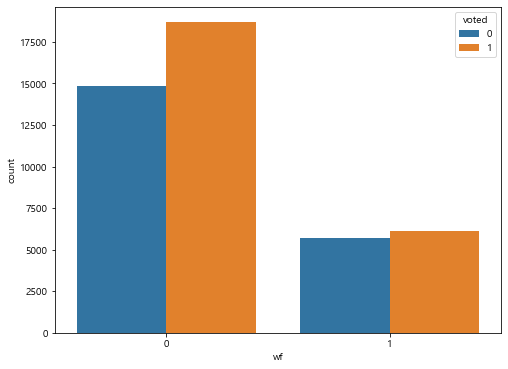

In [59]:
plt.figure(figsize = (8,6))
sns.countplot(data = train, x = 'wf', hue = 'voted')